<small>
Copyright (c) 2017 Andrew Glassner

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.
</small>



# Deep Learning From Basics to Practice
## by Andrew Glassner, https://dlbasics.com, http://glassner.com
------
## Chapter 25: Reinforcement Learning
### Notebook 1: Miscellaneous images

This notebook is provided as a “behind-the-scenes” look at code used to make some of the figures in this chapter. It is still in the hacked-together form used to develop the figures, and is only lightly commented.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
# Make a File_Helper for saving and loading files.

save_files = True

import os, sys, inspect
current_dir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
sys.path.insert(0, os.path.dirname(current_dir)) # path to parent dir
from DLBasics_Utilities import File_Helper
file_helper = File_Helper(save_files)

Using TensorFlow backend.


In [3]:
def show_curves(curve_set, labels, title, filename):
    plt.figure(figsize=(9, 6))
    plt.plot(curve_set[0], color='black', linewidth=2, label=labels[0])
    for i in range(1, len(curve_set)):
        plt.plot(curve_set[i], linewidth=2, label=labels[i])

    # http://stackoverflow.com/questions/4700614/how-to-put-the-legend-out-of-the-plot
    ax = plt.gca()
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
    # Put a legend to the right of the current axis
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.title(title)
    plt.ylim(0,1)
    file_helper.save_figure(filename)
    plt.show()

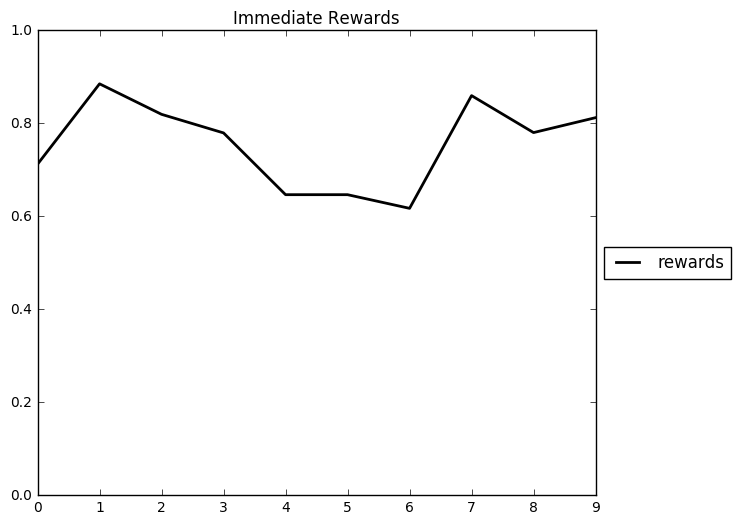

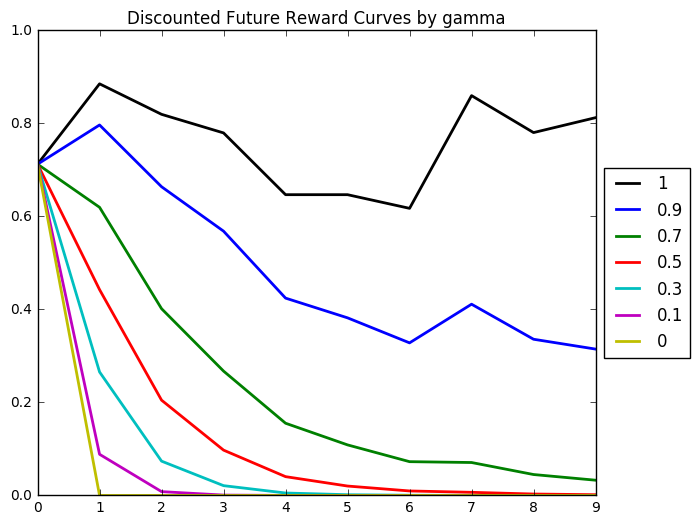

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/matplotlib/axes/_axes.py:531: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


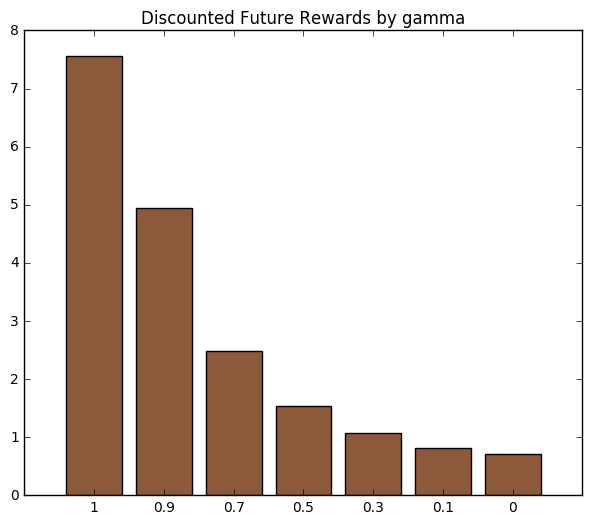

In [4]:
np.random.seed(42)
data = np.random.uniform(.6, .9, size=10)

# rewards
show_curves([data], ['rewards'], 'Immediate Rewards', 'IR')

# discounted future rewards
discount_list = []
labels_list = []
for gamma in [1, .9, .7, .5, .3, .1, 0]:
    v = [data[i]*(gamma**i) for i in range(len(data))]
    discount_list.append(v)
    labels_list.append(str(gamma))
show_curves(discount_list, labels_list, 'Discounted Future Reward Curves by gamma', 'DFRcurves')

plt.figure(figsize=(9, 6))
sums_list = []
for i in range(len(discount_list)):
    sums_list.append(np.sum(discount_list[i]))
plt.bar(range(len(sums_list)), sums_list, .8, color='#8C593B', align="center")
# http://stackoverflow.com/questions/4700614/how-to-put-the-legend-out-of-the-plot
ax = plt.gca()
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xticks(range(len(labels_list)), labels_list)
plt.title('Discounted Future Rewards by gamma')
file_helper.save_figure('DFR-sums')
plt.show()

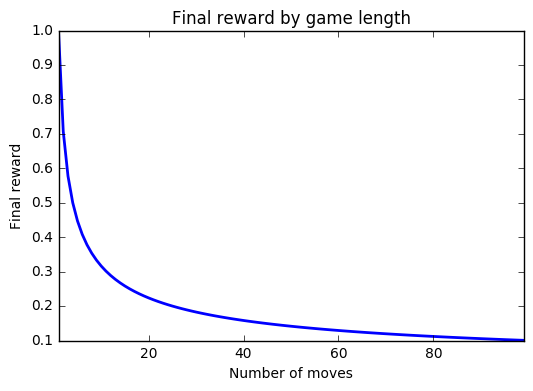

In [5]:
# reward by game length
#plt.figure(figsize=(9, 6))
x = range(1, 100)
y = [1./math.sqrt(xp) for xp in x]
plt.plot(x, y, linewidth=2)
plt.xlabel('Number of moves')
plt.ylabel('Final reward')
plt.title('Final reward by game length')
plt.xlim(1,99)
file_helper.save_figure('flipper-reward-curve')
plt.show()